In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd

In [2]:
df=pd.read_csv("C://Users//sebas//OneDrive//Documents//Data//fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
label_map=['Anger','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [4]:
df_train=df[df['Usage']=='Training']
df_val=df[df['Usage']=='PrivateTest']
df_test=df[df['Usage']=='PublicTest']

print ("Number of Train Images: {}".format(df_train.shape[0]))

Number of Train Images: 28709


In [5]:
#transform = transforms.Compose([transforms.Normalize([0.5], [0.5])]) #this is for 1 channel image data

class ImageReader(Dataset):
    def __init__(self, raw_data, raw_labels, transforms=None):
        self.data=raw_data
        self.labels=raw_labels
        self.transforms=transforms
    
    def __getitem__(self, idx):
        #face=torch.cuda.IntTensor(self.data[idx])
        face = self.data[idx]
        #labels = torch.cuda.IntTensor(self.labels)[idx].cuda()
        labels = self.labels[idx]
        
        if self.transforms:
            face = self.transforms(face)
    
        return face, labels
        
    def __len__(self):
        return len(self.labels)

In [6]:
BATCH_SIZE = 128

#train samples
train_samples=np.array([np.fromstring(img, np.uint8, sep=" ").reshape((1,48,48)) for img in df_train['pixels']])
train_labels=df_train['emotion'].values

train_data=ImageReader(train_samples, train_labels,transforms=None)
train_loader=DataLoader(train_data,batch_size=BATCH_SIZE, shuffle=True)

#validation samples
val_samples=np.array([np.fromstring(img, np.uint8, sep=" ").reshape((1,48,48)) for img in df_val['pixels']])
val_labels=df_val['emotion'].values

val_data=ImageReader(val_samples, val_labels,transforms=None)
val_loader=DataLoader(val_data,batch_size=BATCH_SIZE, shuffle=True)

#test samples
test_samples=np.array([np.fromstring(img, np.uint8, sep=" ").reshape((1,48,48)) for img in df_test['pixels']])
test_labels=df_test['emotion'].values

test_data=ImageReader(test_samples, test_labels,transforms=None)
test_loader=DataLoader(test_data,batch_size=BATCH_SIZE, shuffle=False)


In [7]:
def pixel_checker_test(samples, labels):
    if samples.shape[-2:] == (48,48):
        print ("Sample shape ok!")
    else:
        print ("Shape is wrong")
    
    if samples.shape[0] == labels.shape[0]:
        print ("Sample same shape as Labels")
    else:
        print("Sample and Labels don't match")

print ("For train set: \n")
pixel_checker_test(train_samples, train_labels)

print ("\nFor val set: \n")
pixel_checker_test(val_samples, val_labels)

print ("\nFor test set: \n")
pixel_checker_test(test_samples, test_labels)

For train set: 

Sample shape ok!
Sample same shape as Labels

For val set: 

Sample shape ok!
Sample same shape as Labels

For test set: 

Sample shape ok!
Sample same shape as Labels


In [8]:
for img, lab in train_loader:
    break
    
img.shape

torch.Size([128, 1, 48, 48])

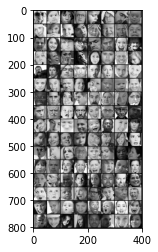

 Fear   Sad   Sad Disgust  Fear Anger   Sad Surprise  Fear  Fear Happy Surprise  Fear   Sad Anger  Fear Anger Happy Neutral Happy   Sad   Sad Surprise Neutral Surprise Happy Surprise   Sad   Sad Neutral Happy   Sad  Fear Neutral   Sad  Fear Surprise Surprise Surprise Happy Neutral  Fear Neutral Happy Neutral Neutral Neutral Happy Happy Neutral Happy Neutral Surprise Neutral   Sad  Fear Anger Anger Disgust Neutral Happy   Sad Neutral Anger  Fear Neutral Happy Happy Happy Neutral Happy Neutral Neutral Happy Anger   Sad  Fear  Fear Anger Surprise  Fear  Fear Neutral Neutral Happy   Sad Neutral Happy Anger  Fear  Fear  Fear   Sad Anger   Sad Neutral Surprise Neutral Happy Surprise Happy Neutral  Fear Happy Surprise Surprise  Fear   Sad  Fear Neutral Neutral Happy  Fear Neutral Surprise   Sad  Fear Anger Happy Surprise Anger Happy   Sad Happy Neutral   Sad Surprise Happy


In [9]:
def imshow(img):
    #img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % label_map[labels[j]] for j in range(BATCH_SIZE)))

In [19]:
conv1 = nn.Conv2d(1,64,3)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(64,64,3)
conv3 = nn.Conv2d(64,128,3)
conv4 = nn.Conv2d(128,128,3)
conv5 = nn.Conv2d(128,256,3)
conv6 = nn.Conv2d(256,256,3)
print(images.shape)
x = conv1(images.float())
print(x.shape)
x= conv2(x)
print(x.shape)
x= pool(x)
print(x.shape)
x = conv3(x)
print(x.shape)
x = conv4(x)
print(x.shape)
x= pool(x)
print(x.shape)
x = conv5(x)
print(x.shape)
x = conv6(x)
print(x.shape)
x= pool(x)
print(x.shape)

torch.Size([128, 1, 48, 48])
torch.Size([128, 64, 46, 46])
torch.Size([128, 64, 44, 44])
torch.Size([128, 64, 22, 22])
torch.Size([128, 128, 20, 20])
torch.Size([128, 128, 18, 18])
torch.Size([128, 128, 9, 9])
torch.Size([128, 256, 7, 7])
torch.Size([128, 256, 5, 5])
torch.Size([128, 256, 2, 2])


In [28]:
'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=(1, 1))
        self.norm1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=(1, 1))
        self.norm2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 22 * 22, 512)
        self.fc2 = nn.Linear(512, 7)
        
    def forward(self, x):
        x = F.relu(self.norm1(self.conv1(x.float()))) #46
        x = F.relu(self.norm2(self.conv2(x))) #44
        x = F.max_pool2d(x, 2) #22
        x = F.dropout(x, training=self.training)
        x = x.view(-1, 64 * 22 * 22)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=(1, 1))
        self.norm1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=(1, 1))
        self.norm2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=(1, 1))
        self.norm3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=(1, 1))
        self.norm4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=(1, 1))
        self.norm5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=(1, 1))
        self.norm6 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2= nn.Linear(512, 512)
        self.fc3= nn.Linear(512, 7)
        
    def forward(self, x):
        x = F.relu(self.norm1(self.conv1(x.float()))) #46
        x = F.relu(self.norm2(self.conv2(x))) #44
        x = F.max_pool2d(x, 2) #22
        x = F.dropout(x, training=self.training)
        x = F.relu(self.norm3(self.conv3(x))) #46
        x = F.relu(self.norm4(self.conv4(x))) #44
        x = F.max_pool2d(x, 2) #22
        x = F.dropout(x, training=self.training)
        x = F.relu(self.norm5(self.conv5(x)))
        x = F.relu(self.norm6(self.conv6(x)))#44
        x = F.max_pool2d(x, 2) #22
        x = F.dropout(x, training=self.training)
        x = x.view(-1, 256 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5, training=self.training)
        x = self.fc3(x)
        return x

In [12]:
'''
class Net(nn.Module):
    def __init__(self, n_classes):
        super(Net, self).__init__()
        # conv layers: (in_channel size, out_channels size, kernel_size, stride, padding)
        self.conv1_1 = nn.Conv2d(1, 64, kernel_size=1, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=1, padding=1)

        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=1, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=1, padding=1)

        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=1, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=1, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=1, padding=1)

        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=1, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=1, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=1, padding=1)

        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=1, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=1, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=1, padding=1)

        # max pooling (kernel_size, stride)
        self.pool = nn.MaxPool2d(2, 2)

        # fully conected layers:
        self.fc6 = nn.Linear(784, 4096)
        self.fc7 = nn.Linear(4096, 4096)
        self.fc8 = nn.Linear(4096, 1000)

    def forward(self, x, training=True):
        x = F.relu(self.conv1_1(x.float()))
        x = F.relu(self.conv1_2(x))
        x = self.pool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.pool(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.pool(x)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.pool(x)
        print(x.shape)
        x = x.view(-1, 784)
        x = F.relu(self.fc6(x))
        x = F.dropout(x, 0.5, training=training)
        x = F.relu(self.fc7(x))
        x = F.dropout(x, 0.5, training=training)
        x = self.fc8(x)
        return x
'''

'\nclass Net(nn.Module):\n    def __init__(self, n_classes):\n        super(Net, self).__init__()\n        # conv layers: (in_channel size, out_channels size, kernel_size, stride, padding)\n        self.conv1_1 = nn.Conv2d(1, 64, kernel_size=1, padding=1)\n        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=1, padding=1)\n\n        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=1, padding=1)\n        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=1, padding=1)\n\n        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=1, padding=1)\n        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=1, padding=1)\n        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=1, padding=1)\n\n        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=1, padding=1)\n        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=1, padding=1)\n        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=1, padding=1)\n\n        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=1, padding=1)\n        self.conv5_2 = nn.Conv2d(512, 

In [29]:
'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3,3), stride=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=(3,3), stride=1)
        self.fc1 = nn.Linear(512 * 9 * 9, 120)
        self.fc2 = nn.Linear(84, 7)

    def forward(self, x):
        #x = F.max_pool2d(F.relu(self.conv1(x.float())), (2, 2))
        x = F.relu(self.conv1(x.float())), (2, 2)
        x = x.view(-1, 512 * 9 * 9)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(36 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x.float())))
        x = self.pool(F.relu(self.conv2(x.float())))
        x = x.view(-1, 36 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=(1, 1))
        self.norm1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=(1, 1))
        self.norm2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=(1, 1))
        self.norm3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=(1, 1))
        self.norm4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=(1, 1))
        self.norm5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(128, 256, kernel_size=3, stride=(1, 1))
        self.norm6 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(128 * 9 * 9, 4096)
        self.fc2 = nn.Linear(4096, 10)
        
    def forward(self, x):
        x = F.relu(self.norm1(self.conv1(x.float()))) #46
        x = F.relu(self.norm2(self.conv2(x))) #44
        x = F.max_pool2d(x, 2) #22
        x = F.dropout(x, training=self.training)
        x = F.relu(self.norm3(self.conv3(x)))#20
        x = F.relu(self.norm4(self.conv4(x)))#18
        x = F.max_pool2d(x, 2)#9
        x = F.dropout(x, training=self.training)
        x = F.relu(self.norm5(self.conv5(x)))#20
        x = F.relu(self.norm6(self.conv6(x)))#18
        x = F.max_pool2d(x, 2)#9
        x = F.dropout(x, training=self.training)
        x = x.view(-1, 128 * 9 * 9)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim = 0)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 7)
        
    def forward(self, x):
        x = F.relu(self.conv1(x.float()))
        x = F.max_pool2d(x, 2, 2) 
        #print(x.shape)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        #print(x.shape)
        x = x.view(-1, 64 * 5 * 5)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)


'''
#net = Net(len(label_map)).cuda()
net = Net().cuda()

In [30]:
net.forward

<bound method Net.forward of Net(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (norm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (norm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (norm5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (norm6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1024, out_featur

In [31]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [32]:
total_epochs = 30

for epoch in range(total_epochs):  # loop over the dataset multiple times
    
    running_loss = 0.0
    correct, total = 0,0
    val_correct, val_total=0,0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # forward + backward + optimize
        outputs = net(inputs)
        #print(outputs.shape)
        optimizer.zero_grad()
        loss = criterion (outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        #ACCURACY
        #running_acc += accuracy(outputs, labels)
        
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        #train_correct.append(trn_corr) 
    #correct = (outputs == labels).float().sum()
    
    #print("Epoch {}/{}, Loss: {:.3f}".format(epoch+1,total_epochs, loss.data[0]))
    print("Epoch {}/{}".format(epoch+1,total_epochs))
    print("Accuracy: {}".format(100 * correct/total))
    
    with torch.no_grad():
        for i, val_data in enumerate(val_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
            val_inputs, val_labels = val_data
            val_inputs, val_labels = val_inputs.cuda(), val_labels.cuda()
            
            val_outputs = net(val_inputs)
            
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
            
        print("Val Accuracy: {}".format(100 * val_correct/val_total))

print('Finished Training')

Epoch 1/30
Accuracy: 24.657772823853147
Val Accuracy: 28.280858177765396
Epoch 2/30
Accuracy: 32.37312341077711
Val Accuracy: 36.50041794371691
Epoch 3/30
Accuracy: 39.012156466613256
Val Accuracy: 40.70771802730565
Epoch 4/30
Accuracy: 42.659096450590404
Val Accuracy: 44.10699359152967
Epoch 5/30
Accuracy: 45.11825559928942
Val Accuracy: 46.41961549178044
Epoch 6/30
Accuracy: 47.054930509596296
Val Accuracy: 47.64558372805796
Epoch 7/30
Accuracy: 48.54226897488592
Val Accuracy: 49.48453608247423
Epoch 8/30
Accuracy: 49.68476784283674
Val Accuracy: 49.791028141543606
Epoch 9/30
Accuracy: 51.03277717788847
Val Accuracy: 50.59905266090833
Epoch 10/30
Accuracy: 51.72245637256609
Val Accuracy: 51.574254667038176
Epoch 11/30
Accuracy: 52.41910202375562
Val Accuracy: 52.54945667316802
Epoch 12/30
Accuracy: 53.356090424605526
Val Accuracy: 52.577319587628864
Epoch 13/30
Accuracy: 53.57553380473023
Val Accuracy: 52.3822791864029
Epoch 14/30
Accuracy: 54.96882510710927
Val Accuracy: 53.97046531

In [ ]:
total_epochs = 20
train_losses =[]
test_losses = []
train_corr_list = []
test_corr_list = []

for epoch in range(total_epochs):  # loop over the dataset multiple times
    
    train_corr, test_corr = 0, 0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward + backward + optimize
        outputs = net(inputs)
        
        loss = criterion (outputs, labels)
        predicted = torch.max(outputs.data, 1)[1]
        batch_corr = (predicted == labels).sum()
        train_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # print statistics
        if i % 600 == 0:    # print every 2000 mini-batches
            print('[{:d}], [{:5d}] loss: {:0.3f}'.format (epoch + 1, i + 1, loss.item()))
            
    train_losses.append(loss)   
    train_corr_list.append(train_corr)
    
    with torch.no_grad():
        for i, val_data in enumerate(val_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
            val_inputs, val_labels = val_data
            
            val_outputs = net(val_inputs)
            
            val_predicted = torch.max(val_outputs.data, 1)[1]
            val_test_corr = (val_predicted == val_labels).sum() 
            test_corr += val_test_corr
            
    val_outputs = criterion(val_outputs, val_labels)
    test_losses.append(loss)
    test_corr_list.append(test_corr)
        

print('Finished Training')

In [ ]:
plt.plot(train_losses, label='train-losses')
plt.plot(test_losses, label='test-losses')
plt.legend()

In [ ]:
train_corr_list

In [ ]:
plt.plot([t//600 for t in train_corr_list], label='training-accuracy')
plt.plot([t//100 for t in test_corr_list],label='validation-accuracy')
plt.legend()

In [ ]:
test_samples=np.array([np.fromstring(img, np.uint8, sep=" ").reshape((1,48,48)) for img in df_test['pixels']])
test_labels=df_test['emotion'].values

test_data=ImageReader(test_samples, test_labels,transforms=None)

test_loader=DataLoader(test_data,batch_size=16, shuffle=True)

In [ ]:
with torch.no_grad():
    correct = 0
    for x_test, y_test in test_loader:
        y_pred = net(x_test)
        pred = torch.max(y_pred, 1)[1]
        correct += (pred == y_test).sum()

In [ ]:
correct.item()/len(test_data)

In [ ]:
total_epochs = 5

#train_losses, test_losses, train_correct, test_correct=[],[],[],[]

for epoch in range(total_epochs):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #optimizer.zero_grad()
        #loss = criterion(outputs, labels)
        loss = criterion (outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[{:d}], [{:5d}] loss: {:0.3f}'.format (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            correct=0.0
        
        #train_correct.append(trn_corr) 

print('Finished Training')

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % label_map[labels[j]] for j in range(4)))

In [ ]:
PATH = './facial expression.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % label_map[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))